#  Data Analytics and Machine Learning of the Data space in Granular Flow

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


In [2]:
#pd.set_option('display.max_column', None)
#pd.set_option('display.max_rows', None)

# 1.0 Combining the data gathered for each time step into a single csv file

In [3]:
granular_flow_data_paths=['./Tables(small data set)/XYZ_Internal_Table_table_100.csv',
                          './Tables(small data set)/XYZ_Internal_Table_table_200.csv', 
                          './Tables(small data set)/XYZ_Internal_Table_table_300.csv', 
                          './Tables(small data set)/XYZ_Internal_Table_table_400.csv', 
                          './Tables(small data set)/XYZ_Internal_Table_table_500.csv', 
                          './Tables(small data set)/XYZ_Internal_Table_table_600.csv', 
                          './Tables(small data set)/XYZ_Internal_Table_table_700.csv', 
                          './Tables(small data set)/XYZ_Internal_Table_table_800.csv', 
                          './Tables(small data set)/XYZ_Internal_Table_table_900.csv', 
                          './Tables(small data set)/XYZ_Internal_Table_table_1000.csv', 
                          './Tables(small data set)/XYZ_Internal_Table_table_1100.csv' ]

granular_flow_dataset = []
for datapath in granular_flow_data_paths:
    df=pd.read_csv(datapath)
    granular_flow_dataset.append(df)


In [4]:
y=pd.concat(granular_flow_dataset)
Combined_flow_data=y.to_csv('./Combined flow data (small data).csv')
Combined_flow_data

# 2.0 Working With the Saved file

## 2.1 Reading (Loading) the combined saved data

In [5]:

Granular_flow_data= pd.read_csv('./Combined flow data (small data).csv')
Granular_flow_data

,Unnamed: 0,Time (s),Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m),Particle Velocity[i] (m/s),Particle Velocity[j] (m/s),Particle Velocity[k] (m/s),Particle Velocity: Magnitude (m/s),Volume Fraction of Phase 1,Wall Shear Stress: Magnitude (Pa),Report: Element Count 1,Report: Total Solver CPU Time (s),X (m),Y (m),Z (m)
0,0,0.02,-0.105754,0.031774,0.002455,0.761367,3.673675e-03,-0.138890,0.773941,0.064024,0,2777,24.532,-0.105754,0.031774,0.002455
1,1,0.02,-0.106013,0.024868,0.015521,0.648313,2.494714e-04,-0.251882,0.695525,0.077178,0,2777,24.532,-0.106013,0.024868,0.015521
2,2,0.02,-0.106014,0.027605,0.006328,0.647975,-1.013336e-04,-0.251266,0.694986,0.064024,0,2777,24.532,-0.106014,0.027605,0.006328
3,3,0.02,-0.106013,0.024352,0.008947,0.648059,4.421311e-05,-0.251678,0.695214,0.064024,0,2777,24.532,-0.106013,0.024352,0.008947
4,4,0.02,-0.106007,0.026172,0.016868,0.648702,7.440611e-04,-0.250163,0.695267,0.077178,0,2777,24.532,-0.106007,0.026172,0.016868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132311,18270,0.22,-0.117250,0.040575,0.014844,0.538821,1.922194e-07,-0.108071,0.549552,0.040602,0,18275,607.436,-0.117250,0.040575,0.014844
132312,18271,0.22,-0.117254,0.040656,0.010430,0.538780,3.806327e-09,-0.108018,0.549502,0.086906,0,18275,607.436,-0.117254,0.040656,0.010430
132313,18272,0.22,-0.117258,0.031591,0.021938,0.538739,-2.009805e-07,-0.107967,0.549452,0.048327,0,18275,607.436,-0.117258,0.031591,0.021938
132314,18273,0.22,-0.117265,0.035741,0.021986,0.538658,9.289315e-08,-0.107863,0.549351,0.040602,0,18275,607.436,-0.117265,0.035741,0.021986


## Finding patterns in the data using correlation matrix

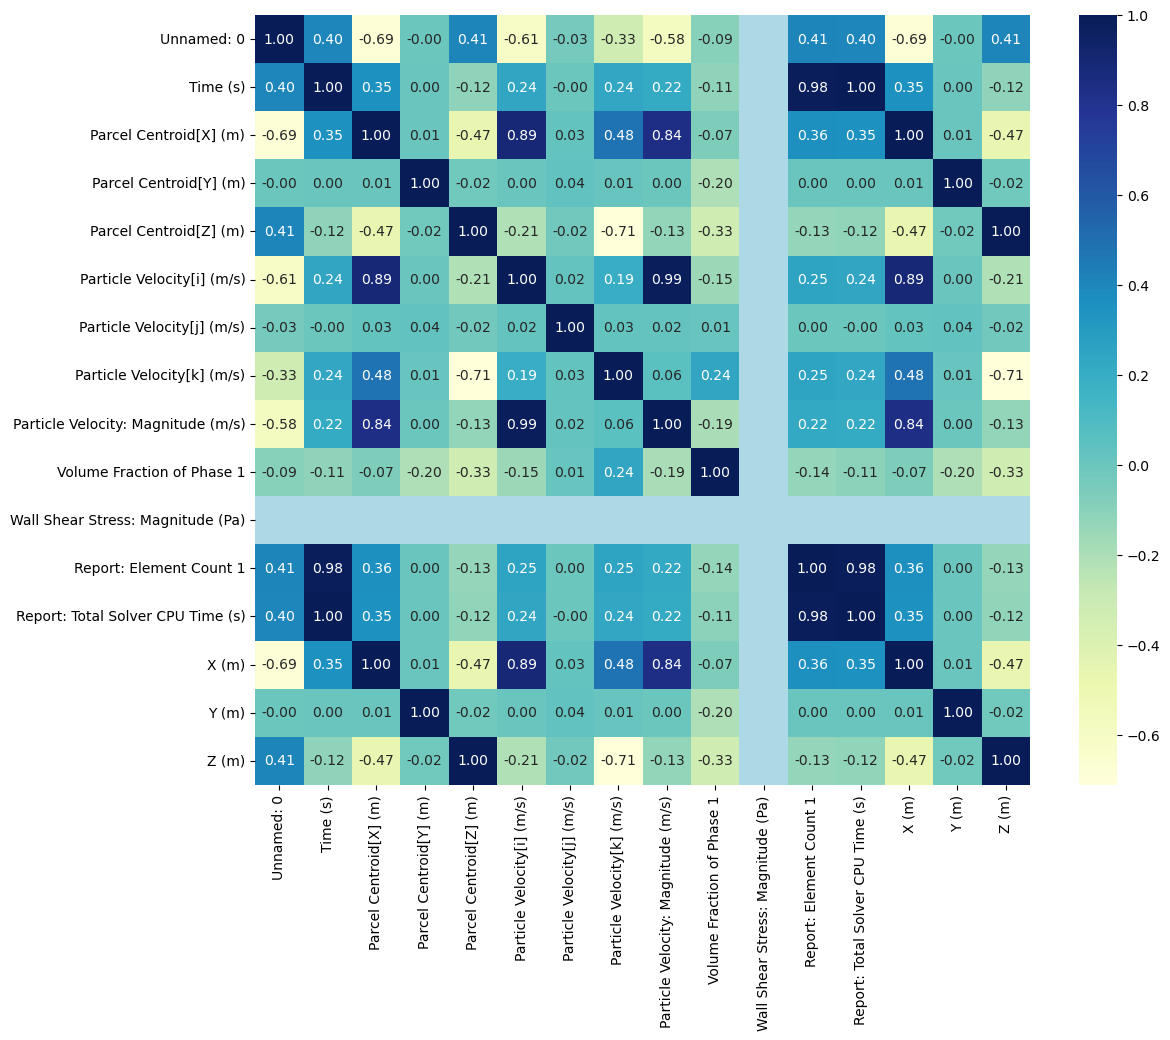

In [6]:
import seaborn as sns

corr_matrix =Granular_flow_data.corr()

fig, ax_corr_Matrix=plt.subplots(figsize=(12.5,10))

color = plt.get_cmap('YlGnBu')   # default color
color.set_bad('lightblue')  

ax =sns.heatmap(corr_matrix, 
                annot=True,
                fmt=".2f",
                cmap=color
               )
fig.savefig('./Correlation_matrix_for_the_data.png', dpi=1200, bbox_inches='tight')

## 2.2 Splitting the data

In [7]:

X=Granular_flow_data.drop(['Parcel Centroid[X] (m)', 'Parcel Centroid[Y] (m)', 'Parcel Centroid[Z] (m)', 'X (m)',	'Y (m)',	'Z (m)'], axis=1)
y= Granular_flow_data[['Parcel Centroid[X] (m)', 'Parcel Centroid[Y] (m)', 'Parcel Centroid[Z] (m)']]


In [8]:
X

,Unnamed: 0,Time (s),Particle Velocity[i] (m/s),Particle Velocity[j] (m/s),Particle Velocity[k] (m/s),Particle Velocity: Magnitude (m/s),Volume Fraction of Phase 1,Wall Shear Stress: Magnitude (Pa),Report: Element Count 1,Report: Total Solver CPU Time (s)
0,0,0.02,0.761367,3.673675e-03,-0.138890,0.773941,0.064024,0,2777,24.532
1,1,0.02,0.648313,2.494714e-04,-0.251882,0.695525,0.077178,0,2777,24.532
2,2,0.02,0.647975,-1.013336e-04,-0.251266,0.694986,0.064024,0,2777,24.532
3,3,0.02,0.648059,4.421311e-05,-0.251678,0.695214,0.064024,0,2777,24.532
4,4,0.02,0.648702,7.440611e-04,-0.250163,0.695267,0.077178,0,2777,24.532
...,...,...,...,...,...,...,...,...,...,...
132311,18270,0.22,0.538821,1.922194e-07,-0.108071,0.549552,0.040602,0,18275,607.436
132312,18271,0.22,0.538780,3.806327e-09,-0.108018,0.549502,0.086906,0,18275,607.436
132313,18272,0.22,0.538739,-2.009805e-07,-0.107967,0.549452,0.048327,0,18275,607.436
132314,18273,0.22,0.538658,9.289315e-08,-0.107863,0.549351,0.040602,0,18275,607.436


In [9]:
y

,Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m)
0,-0.105754,0.031774,0.002455
1,-0.106013,0.024868,0.015521
2,-0.106014,0.027605,0.006328
3,-0.106013,0.024352,0.008947
4,-0.106007,0.026172,0.016868
...,...,...,...
132311,-0.117250,0.040575,0.014844
132312,-0.117254,0.040656,0.010430
132313,-0.117258,0.031591,0.021938
132314,-0.117265,0.035741,0.021986


## 2.3 Checking if there is any missing value in our data
            * If there is any non-numerical value, we perform feature encoding
            * And/ or if there is any missing value, we perform imputation
            * If no missing value, then we continue to building the machine Learning Model

In [10]:
X.isna().sum()

Unnamed: 0                            0
Time (s)                              0
Particle Velocity[i] (m/s)            0
Particle Velocity[j] (m/s)            0
Particle Velocity[k] (m/s)            0
Particle Velocity: Magnitude (m/s)    0
Volume Fraction of Phase 1            0
Wall Shear Stress: Magnitude (Pa)     0
Report: Element Count 1               0
Report: Total Solver CPU Time (s)     0
dtype: int64

In [11]:
y.isna().sum()

Parcel Centroid[X] (m)    0
Parcel Centroid[Y] (m)    0
Parcel Centroid[Z] (m)    0
dtype: int64

# 3.0 Building and Training the Machine Learning Model for our Data

In [12]:
from sklearn.ensemble import RandomForestRegressor

model1 =RandomForestRegressor(n_estimators=10)
model1.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(n_estimators=10)>

In [13]:
np.random.seed(42)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,
                                                   test_size=0.2)

model1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

## 3.1 Predicting with our model

In [14]:
y_preds=model1.predict(X_test)

y_preds


array([[-0.07033733,  0.03015237,  0.00623679],
       [-0.09819082,  0.0354989 ,  0.00903425],
       [-0.10166821,  0.03635914,  0.00661332],
       ...,
       [-0.10083132,  0.0295711 ,  0.01283442],
       [-0.06159568,  0.02427658,  0.00175479],
       [-0.09550467,  0.03003019,  0.01164979]])

In [15]:
y_preds=pd.DataFrame(y_preds, columns=['Parcel Centroid[X] (m)',	'Parcel Centroid[Y] (m)',	'Parcel Centroid[Z] (m)'])
y_preds

,Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m)
0,-0.070337,0.030152,0.006237
1,-0.098191,0.035499,0.009034
2,-0.101668,0.036359,0.006613
3,-0.099405,0.035691,0.003851
4,-0.078971,0.032328,0.006506
...,...,...,...
26459,-0.083500,0.035491,0.003956
26460,-0.052765,0.035463,0.005692
26461,-0.100831,0.029571,0.012834
26462,-0.061596,0.024277,0.001755


In [16]:
y_test

,Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m)
86244,-0.071601,0.029988,0.005125
76220,-0.100030,0.036615,0.007536
23934,-0.102130,0.037137,0.006242
91842,-0.099844,0.031683,0.003446
30939,-0.080180,0.032091,0.006331
...,...,...,...
123424,-0.082554,0.039152,0.005637
100623,-0.052231,0.034208,0.005803
92603,-0.100923,0.033062,0.010606
99994,-0.056339,0.022383,0.003182


## 3.2 Scoring our model

In [17]:
model1.score(X_train, y_train)

0.9772600438344501

In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

metrics ={"r-squared": r2_score, 
          "Mean absolute error (MAE)": mean_absolute_error, 
          "Mean squared error(MSE)":mean_squared_error, 
          
         }
model1_scores={}

for key,value in metrics.items():
    model1_scores[key]=value(y_test, y_preds)

    
model1_scores

{'r-squared': 0.8689837633149927,
 'Mean absolute error (MAE)': 0.0013941312758877593,
 'Mean squared error(MSE)': 4.308327966267113e-06}

# 4.0 Plotting the Data
Plotting at the first time-index of the test data This is equivalent to the zeroth index
We can do the same for other indexes

In [19]:
actual_Xi = y_test.iloc[:, :1]
actual_Xj=y_test.iloc[:, :2].drop('Parcel Centroid[X] (m)', axis =1)

predicted_Xi = y_preds.iloc[:, :1]
predicted_Xj = y_preds.iloc[:, :2].drop('Parcel Centroid[X] (m)', axis =1)


## 4.2 Separate plots of the Actual Granules Position and the Predicted Granules Position

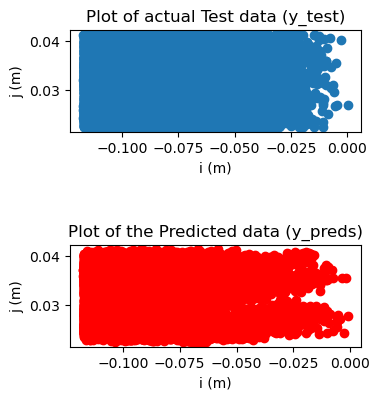

In [20]:
#Plotting the actual and Predicted positions 
# Plot the actual and predicted positions
#plt.scatter(actual_Xi, actual_Xj, color='blue', label='Actual')

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(5,5))

ax1.scatter(actual_Xi, actual_Xj)
ax2.scatter(predicted_Xi, predicted_Xj, color='red')

ax1.set(title="Plot of actual Test data (y_test)", 
              xlabel='i (m)',
              ylabel='j (m)'
             )
fig.tight_layout(pad=5)

ax2.set(title= "Plot of the Predicted data (y_preds)", 
        xlabel= 'i (m)',
        ylabel='j (m)'
       )

plt.savefig("./Separate plots of Actual and Predicted granules Position.png",  dpi=1200)

## 4.3 Plotting the Actual Granules Position against the Predicted Granules Position

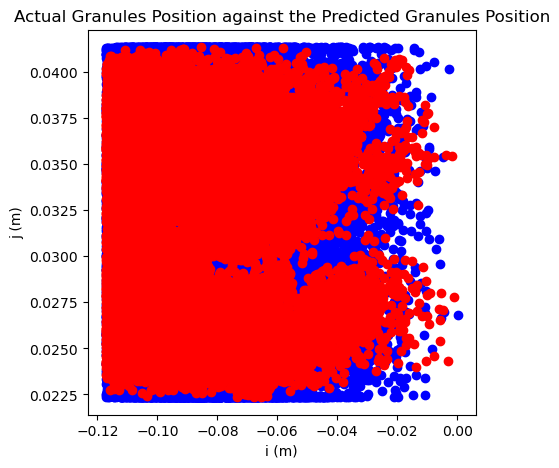

In [21]:
fig, ax3 =plt.subplots(1,1,figsize=(5,5))

ax3.scatter(actual_Xi, actual_Xj, color ='blue')

ax3.scatter(predicted_Xi, predicted_Xj, color='red')

ax3.set(title="Actual Granules Position against the Predicted Granules Position",
      xlabel="i (m)",
      ylabel="j (m)")

plt.savefig('./Actual vs Predicted.png')

In [22]:
## 4.3 Plot of the Actual against the Predicted Granules position of the first 500 granules 

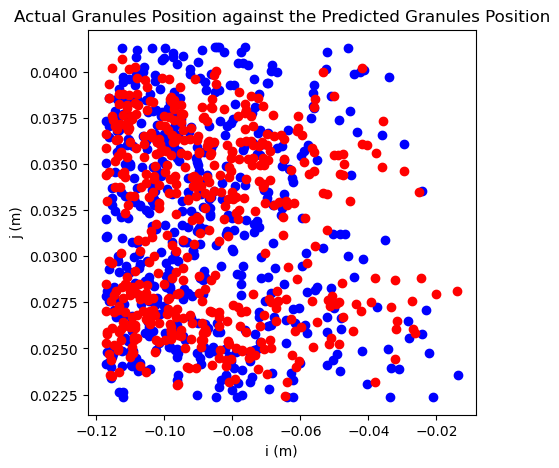

In [23]:
fig, ax4 =plt.subplots(1,1,figsize=(5,5))
plt.scatter(actual_Xi[:500], actual_Xj[:500], color ='blue')
plt.scatter(predicted_Xi[:500], predicted_Xj[:500], color='red')

ax4.set(title="Actual Granules Position against the Predicted Granules Position",
      xlabel="i (m)",
      ylabel="j (m)")

plt.savefig('./Actual vs Predicted.png',  dpi=1200)

# 5.0 Using Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression

model2=LinearRegression()

model2.get_params
model2.fit(X_train, y_train)


LinearRegression()

## 5.1 Making Prediction

In [25]:
yLinear_Preds=model2.predict(X_test)
yLinear_Preds

array([[-0.06841872,  0.03157054,  0.00475152],
       [-0.10180754,  0.03137598,  0.00955407],
       [-0.10221444,  0.03387586,  0.00753561],
       ...,
       [-0.0998795 ,  0.03198919,  0.01344941],
       [-0.05914113,  0.03355112,  0.00375445],
       [-0.09488411,  0.03193539,  0.01299996]])

In [26]:
yLinear_Preds=pd.DataFrame(yLinear_Preds, columns=['Parcel Centroid[X] (m)', 'Parcel Centroid[Y] (m)', 'Parcel Centroid[Z] (m)'])
yLinear_Preds

,Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m)
0,-0.068419,0.031571,0.004752
1,-0.101808,0.031376,0.009554
2,-0.102214,0.033876,0.007536
3,-0.099374,0.032280,0.004200
4,-0.076805,0.032816,0.004762
...,...,...,...
26459,-0.079196,0.031548,0.004791
26460,-0.053974,0.031127,0.003493
26461,-0.099879,0.031989,0.013449
26462,-0.059141,0.033551,0.003754


In [27]:
 y_test

,Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m)
86244,-0.071601,0.029988,0.005125
76220,-0.100030,0.036615,0.007536
23934,-0.102130,0.037137,0.006242
91842,-0.099844,0.031683,0.003446
30939,-0.080180,0.032091,0.006331
...,...,...,...
123424,-0.082554,0.039152,0.005637
100623,-0.052231,0.034208,0.005803
92603,-0.100923,0.033062,0.010606
99994,-0.056339,0.022383,0.003182


## 5.2 Scoring the Linear Regression based model

In [28]:
model2.score(X_train, y_train)

0.5488745530298792

In [29]:
model2.score(X_test, y_test)

0.5443689403856442

## 5.3 Plots of the Actual vs  Predicted Granule Position Using the Linear Regression Model

In [30]:
LR_Pred_Xi=yLinear_Preds.iloc[:,:1]
LR_Pred_Xj=yLinear_Preds.iloc[:, :2].drop('Parcel Centroid[X] (m)', axis =1)

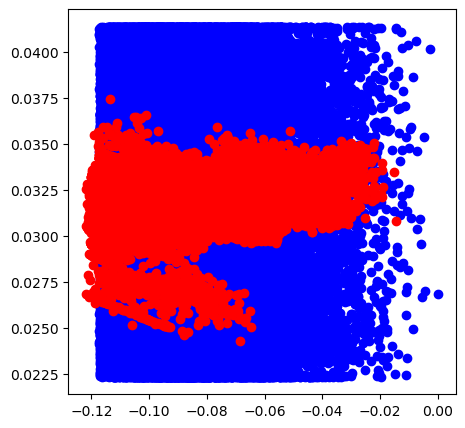

In [31]:
fig, ax5= plt.subplots(figsize=(5,5))

ax5.scatter(actual_Xi, actual_Xj, color='blue')
ax5.scatter(LR_Pred_Xi, LR_Pred_Xj, color='red')

plt.savefig('./LinearRegression_model.png',  dpi=1200)

# 6.0 Using Ridge Regression

In [32]:
from sklearn.linear_model import Ridge

model3= Ridge()

model3.get_params

model3.fit(X_train, y_train)

Ridge()

In [33]:
yRidge_preds=model3.predict(X_test)
yRidge_preds

array([[-0.06845366,  0.03159231,  0.00460025],
       [-0.1019072 ,  0.031418  ,  0.00923375],
       [-0.10236349,  0.03384299,  0.00752346],
       ...,
       [-0.09964227,  0.03195575,  0.01377098],
       [-0.05929278,  0.03357286,  0.00345722],
       [-0.09454213,  0.0318535 ,  0.01367981]])

In [34]:
yRidge_preds=pd.DataFrame(yRidge_preds, columns=['Parcel Centroid[X] (m)', 'Parcel Centroid[Y] (m)', 'Parcel Centroid[Z] (m)'])
yRidge_preds

,Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m)
0,-0.068454,0.031592,0.004600
1,-0.101907,0.031418,0.009234
2,-0.102363,0.033843,0.007523
3,-0.099220,0.032259,0.004388
4,-0.076840,0.032803,0.004801
...,...,...,...
26459,-0.079271,0.031545,0.004782
26460,-0.053984,0.031137,0.003475
26461,-0.099642,0.031956,0.013771
26462,-0.059293,0.033573,0.003457


In [35]:
y_test

,Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m)
86244,-0.071601,0.029988,0.005125
76220,-0.100030,0.036615,0.007536
23934,-0.102130,0.037137,0.006242
91842,-0.099844,0.031683,0.003446
30939,-0.080180,0.032091,0.006331
...,...,...,...
123424,-0.082554,0.039152,0.005637
100623,-0.052231,0.034208,0.005803
92603,-0.100923,0.033062,0.010606
99994,-0.056339,0.022383,0.003182


In [36]:
model3.score(X_train, y_train)

0.5480483619019313

In [37]:
model3.score(X_test, y_test)

0.5437974654789722

## 6.3 Plotting the graph of Actual against Predicted for the Ridge regression Model

In [38]:
RR_preds_Xi= yRidge_preds.iloc[:,:1]
RR_preds_Xj= yRidge_preds.iloc[:, :2].drop('Parcel Centroid[X] (m)', axis =1)


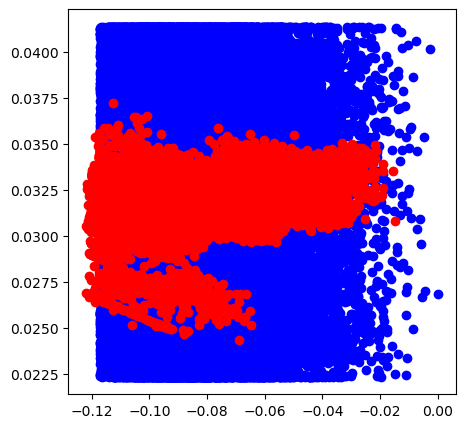

In [39]:
fig, ax6= plt.subplots(figsize=(5,5))

ax6.scatter(actual_Xi, actual_Xj, color='blue')
ax6.scatter(RR_preds_Xi, RR_preds_Xj, color='red')

plt.savefig('./Ridge Model plot.png',  dpi=1200)

# 7 Using SVR

In [40]:
from sklearn.svm import SVR

model4= SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

model4.get_params

model4.fit(X_train, y_train.iloc[:, 0]) # can not capture the 2D array of y, it can predict for 1D

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [41]:
y_train.iloc[:, 0]

79814    -0.113688
15519    -0.111130
109659   -0.100971
46932    -0.096796
61115    -0.098551
            ...   
110268   -0.103024
119879   -0.062998
103694   -0.074700
131932   -0.115980
121958   -0.076546
Name: Parcel Centroid[X] (m), Length: 105852, dtype: float64

In [42]:
y_train.iloc[:, 0].shape

(105852,)

In [43]:
y_train.shape

(105852, 3)

In [44]:
model4.score(X_test, y_test.iloc[:,:1])

-1.9068880574062348

In [45]:
pd.DataFrame(model4.predict(X_test))

,0
0,-0.056474
1,-0.056474
2,-0.056474
3,-0.056474
4,-0.056474
...,...
26459,-0.056474
26460,-0.056474
26461,-0.056474
26462,-0.056474


In [46]:
y_test.iloc[:,0]

86244    -0.071601
76220    -0.100030
23934    -0.102130
91842    -0.099844
30939    -0.080180
            ...   
123424   -0.082554
100623   -0.052231
92603    -0.100923
99994    -0.056339
34119    -0.095481
Name: Parcel Centroid[X] (m), Length: 26464, dtype: float64

# 8.0 Comparing all the Regression Models

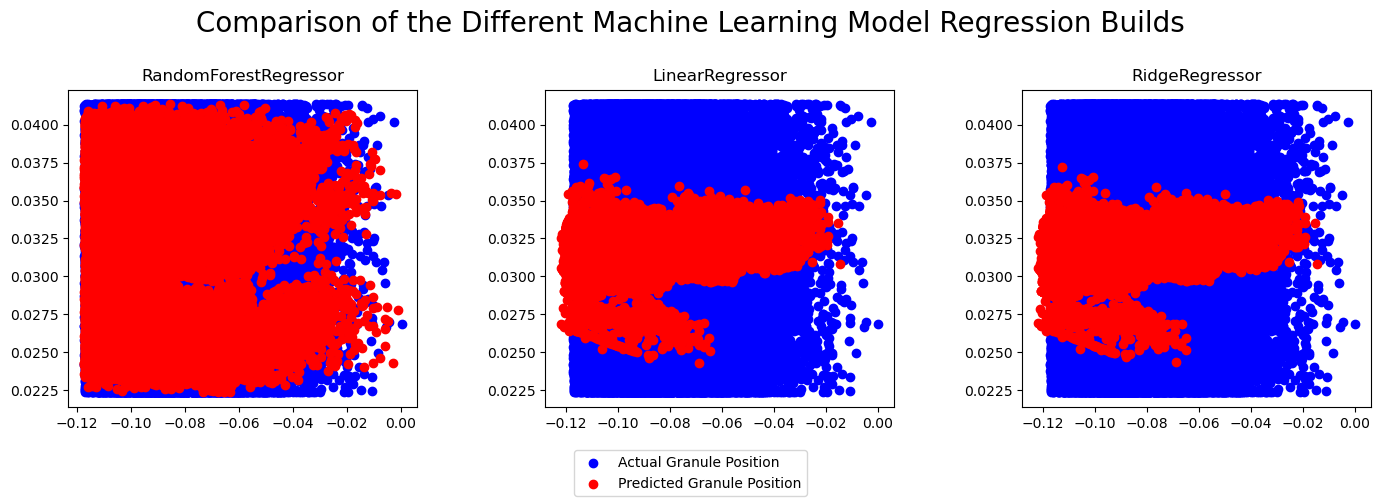

In [47]:
fig, (ax3, ax5, ax6) =plt.subplots(1,3,figsize=(15,5))


l1=ax3.scatter(actual_Xi, actual_Xj, color ='blue')
l2=ax3.scatter(predicted_Xi, predicted_Xj, color='red')
ax3.set(title='RandomForestRegressor')

ax5.scatter(actual_Xi, actual_Xj, color='blue')
ax5.scatter(LR_Pred_Xi, LR_Pred_Xj, color='red')
ax5.set(title='LinearRegressor')

ax6.scatter(actual_Xi, actual_Xj, color='blue')
ax6.scatter(RR_preds_Xi, RR_preds_Xj, color='red')
ax6.set(title='RidgeRegressor')

fig.tight_layout(pad=5.0)
fig.legend(['Actual Granule Position', 'Predicted Granule Position'], loc='lower center')
fig.suptitle('Comparison of the Different Machine Learning Model Regression Builds', fontsize=20)
plt.savefig('./Comparison of the Different Machine Learning Model Regression Builds.png', dpi=1200)

# RandomSearchCV

In [48]:
%%time

from sklearn.model_selection import RandomizedSearchCV

RndmFrst_grid={"n_estimators": np.arange(10,100,10),
               "max_depth":[None,3,5,10]
              }

RndmSrch_RndmFrst=RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions= RndmFrst_grid,
                              cv=5,
                                    n_iter=20,
                              verbose= 10
                             )
RndmSrch_RndmFrst.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START max_depth=None, n_estimators=40............................
[CV 1/5; 1/20] END max_depth=None, n_estimators=40;, score=0.877 total time=  22.0s
[CV 2/5; 1/20] START max_depth=None, n_estimators=40............................
[CV 2/5; 1/20] END max_depth=None, n_estimators=40;, score=0.877 total time=  22.2s
[CV 3/5; 1/20] START max_depth=None, n_estimators=40............................
[CV 3/5; 1/20] END max_depth=None, n_estimators=40;, score=0.876 total time=  22.5s
[CV 4/5; 1/20] START max_depth=None, n_estimators=40............................
[CV 4/5; 1/20] END max_depth=None, n_estimators=40;, score=0.876 total time=  22.5s
[CV 5/5; 1/20] START max_depth=None, n_estimators=40............................
[CV 5/5; 1/20] END max_depth=None, n_estimators=40;, score=0.876 total time=  22.4s
[CV 1/5; 2/20] START max_depth=3, n_estimators=50...............................
[CV 1/5; 2/20] END max_depth=3, 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=10)

In [49]:
%%time

RndmSrch_RndmFrst.score(X_test,y_test)

CPU times: total: 625 ms
Wall time: 622 ms


0.8778079865371787

In [50]:
RndmSrch_RndmFrst.best_params_

{'n_estimators': 70, 'max_depth': None}

## Making Use of the RandomizedSearchCV RandomForest Best_params for predicting our data

In [51]:
improved_model1=RandomForestRegressor(90,max_depth=None)
improved_model1

improved_model1.fit(X_train,y_train)

RandomForestRegressor(n_estimators=90)

In [52]:
improvedModel_yPreds=improved_model1.predict(X_test)
improvedModel_yPreds

array([[-0.07058749,  0.03176791,  0.00615068],
       [-0.09864619,  0.03651269,  0.00863996],
       [-0.1020375 ,  0.036071  ,  0.00621095],
       ...,
       [-0.10093257,  0.02962102,  0.01355002],
       [-0.06235302,  0.02415936,  0.00162112],
       [-0.09545882,  0.03050868,  0.01159398]])

# Evaluating the tuned model

 *The problem in question is that of regression and not classification, so we need to use the Regression metrics.
    https://scikit-learn.org/stable/modules/model_evaluation.html
    * The metrics used in this study are:
            > R-squared score (r-squared)
            > Mean absolute error (MAE)
            > Mean squared error (MSE)
            > Root mean squared error (RMSE)
            > Max error
            

In [53]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

metrics ={"r-squared": r2_score, 
          "Mean absolute error (MAE)": mean_absolute_error, 
          "Mean squared error(MSE)":mean_squared_error, 
          "Root mean Squared error(RMSE)": root_mean_squared_error
         }

Improved_model1_scores={}

for key,value in metrics.items():
   Improved_model1_scores[key]= value(y_test, improvedModel_yPreds).astype("float")

Improved_model1_scores

ImportError: cannot import name 'root_mean_squared_error' from 'sklearn.metrics' (C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

# Comparing these values with the values obtained before Tuning the Machine learning model

Recalling the score values of both models

In [ ]:
model1_scores

In [ ]:
Improved_model1_scores

## Finding the Difference

In [ ]:
score_differences=(np.array(list(Improved_model1_scores.values()))-np.array(list(model1_scores.values())))
score_differences

## Showing the difference in a table

In [ ]:
pd.DataFrame([score_differences] ,columns=[['R-squared diff','Mean absolute error (MAE) diff' ,'Mean squared error(MSE) diff','Root mean Squared error(RMSE) diff']])

# Performing Feature Importance

In [ ]:
feature_importance = improved_model1.feature_importances_
feature_importances= feature_importance[:20]

In [ ]:
plt.barh( X_train.columns, feature_importances)
plt.savefig('./Graph Showing Feature Importance.pdf', dpi=1200, format= 'pdf')

# Predicting the Velocity

In [ ]:
U=Granular_flow_data.drop(["Parcel Centroid[X] (m)", "Parcel Centroid[Y] (m)", "Parcel Centroid[Z] (m)", "Particle Velocity[i] (m/s)", "Particle Velocity[j] (m/s)", "Particle Velocity[k] (m/s)", "Particle Velocity: Magnitude (m/s)"], axis=1)
U

In [ ]:
U["Wall Shear Stress: Magnitude (Pa)"].describe()

In [ ]:
v=Granular_flow_data[["Particle Velocity[i] (m/s)", "Particle Velocity[j] (m/s)", "Particle Velocity[k] (m/s)"]]
v

In [ ]:
%%time

U_train, U_test, v_train, v_test=train_test_split(U,v,
                                                  test_size=0.2, 
                                                  random_state=42)

velocity_model1 =RandomForestRegressor(n_estimators=100)
velocity_model1.fit(U_train, v_train)

In [ ]:
velocity_model1.score(U_test, v_test)

# Using Multi-layer Percerptron Regressor (MLP Regressor)

In [ ]:
%%time

from sklearn.neural_network import MLPRegressor


MLP= MLPRegressor(random_state=42)

MLP.fit(U_train, v_train)

In [ ]:
MLP.score(X=U_test,y=v_test)